# 4. Reporte de métricas y conclusiones

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

📄 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.62      0.29        21
           1       0.99      0.94      0.96       879

    accuracy                           0.93       900
   macro avg       0.59      0.78      0.63       900
weighted avg       0.97      0.93      0.95       900


📄 Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.98      1.00      0.99       879

    accuracy                           0.98       900
   macro avg       0.49      0.50      0.49       900
weighted avg       0.95      0.98      0.97       900


📄 LSTM (Tokenizer) - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.98      1.00      0.99       879

    acc

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

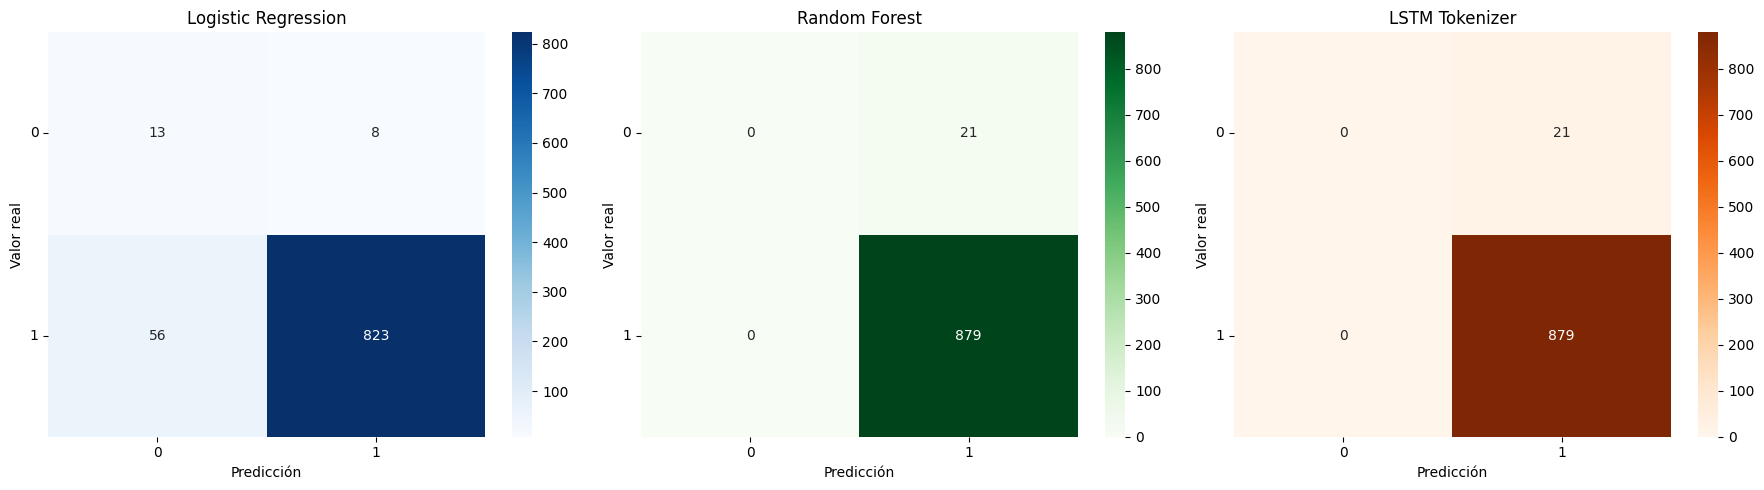

In [2]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from tensorflow.keras.models import load_model

# Cargar modelos y datos desde la carpeta models
log_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/PracticaNLP/models/logistic_model.joblib")
rf_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/PracticaNLP/models/rf_model.joblib")
lstm_model = load_model("/content/drive/MyDrive/Colab Notebooks/PracticaNLP/models/lstm_model.keras")

X_test, y_test = joblib.load("/content/drive/MyDrive/Colab Notebooks/PracticaNLP/models/test_data.joblib")
X_test_pad, y_test_lstm = joblib.load("/content/drive/MyDrive/Colab Notebooks/PracticaNLP/models/test_data_lstm.joblib")

# Predecir con todos los modelos
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype(int).flatten() # la funcion sigmoide devuelve probabilidades, por eso, para que pueda ser representada
                                                                           # en clasificación y confusión, si es > 0,5 se clasifica como 1, sino como 0

# Reportes de clasificación
print("\n📄 Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\n📄 Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\n📄 LSTM (Tokenizer) - Classification Report:")
print(classification_report(y_test_lstm, y_pred_lstm))

# Matrices de confusión con ejes invertidos (Predicción en Y, Valor real en X)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap="Blues", ax=axs[0])
axs[0].set_title("Logistic Regression")
axs[0].set_xlabel("Predicción")
axs[0].set_ylabel("Valor real")
axs[0].set_xticklabels(["0", "1"])
axs[0].set_yticklabels(["0", "1"], rotation=0)

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Greens", ax=axs[1])
axs[1].set_title("Random Forest")
axs[1].set_xlabel("Predicción")
axs[1].set_ylabel("Valor real")
axs[1].set_xticklabels(["0", "1"])
axs[1].set_yticklabels(["0", "1"], rotation=0)

sns.heatmap(confusion_matrix(y_test_lstm, y_pred_lstm), annot=True, fmt='d', cmap="Oranges", ax=axs[2])
axs[2].set_title("LSTM Tokenizer")
axs[2].set_xlabel("Predicción")
axs[2].set_ylabel("Valor real")
axs[2].set_xticklabels(["0", "1"])
axs[2].set_yticklabels(["0", "1"], rotation=0)

plt.tight_layout()
plt.show()


## 🔍 CONCLUSIÓN

- Aunque el *accuracy* en test es alto, **los modelos Random Forest y LSTM no predicen correctamente la clase minoritaria (0)**, como se aprecia claramente en sus matrices de confusión.
- **Logistic Regression**, aunque con baja precisión, **sí consigue detectar algunos ejemplos de clase 0**, lo que ya es una mejora frente a los otros modelos.
- No se han mostrado métricas o matrices de entrenamiento, pero **el patrón observado en test es tan evidente y coherente**, que permite intuir que **en train los modelos han aprendido demasiado bien ese sesgo** y no generalizan al enfrentarse a ejemplos nuevos.

✅ Todo esto apunta a un claro **problema de sobreajuste**, especialmente cuando los modelos ignoran por completo la clase minoritaria.

---

### 📌 Recomendaciones

- Aplicar **validación cruzada (CV)**.
- Usar otros datasets, que ya de base no esten tan desbalanceados, esto me permitiría poder justificar y explicar más en profundidad métricas como el Recall o el F1-Score
- Usar técnicas de **balanceo de clases** como SMOTE, undersampling o recolección de más datos minoritarios
- En modelos clásicos: añadir **regularización** (Lasso, Ridge), **normalización**, y ajuste de hiperparámetros.
- En modelos de deep learning: seguir usando **EarlyStopping** (como en LSTM), reducir el tamaño de entrada o probar otras arquitecturas.

---

### 💡 Modelo más adecuado

En su estado actual, **Logistic Regression es el modelo más idóneo**, ya que al menos logra detectar la clase minoritaria, mientras que **Random Forest y LSTM la ignoran completamente**, lo cual es crítico en problemas desbalanceados.

---

## 🔁 Propuestas futuras

- Probar otras arquitecturas como **GRU**, o combinaciones tipo **Word2Vec + RNN**.
- Incorporar **transformers** o **LLMs preentrenados** para una visión más moderna y completa.
- Explorar más visualizaciones (gráficas por clase o épocas) para complementar el análisis.

---

## ✍️ Valoración personal

Esta práctica me ha permitido conectar todo lo aprendido anteriormente, con una libertad que he disfrutado mucho más que en las anteriores.  
**Crear un dataset desde cero con texto libre, tomar decisiones, evaluar y sacar conclusiones** da una visión completa del flujo real de trabajo.

Aunque no haya representado gráficamente los resultados en *train*, **la matriz de confusión de test es tan clara** que el comportamiento del modelo se puede interpretar perfectamente sin necesidad de más recursos visuales.

Además, esta práctica me ha permitido **explorar más a fondo Google Colab**, y aprender a **organizar y estructurar mejor los proyectos**, no solo a nivel técnico (aplicando NLP con modelos de machine learning y deep learning), sino también en lo relacionado con la **gestión de archivos, separación en ficheros, carpetas y entregas más ordenadas y profesionales**.
